# Room Encoding Server Demo


In [1]:
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
import utils

## ⚙️ Server Configuration

In [13]:
# Server configuration
SERVER_URL = "http://localhost:8082"
response = requests.get(f"{SERVER_URL}/")
print("✅ Server online" if response.status_code == 200 else "❌ Server offline")

✅ Server online


## 👉 Single window

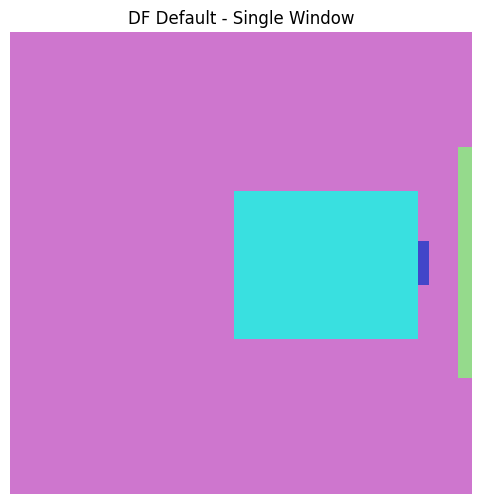

In [25]:
# Load payload from JSON file
with open("../assets/df_default_single.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_df_default.png").write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

In [26]:
import requests
# SERVER_URL = "http://51.15.197.220:8082"

pld = {
  "parameters": {
    "room_polygon": [[0, 0], [0, 7], [-3, 7], [-3, 0]],
    "windows": {
      "window_id": {
        "x1": -0.2, "y1": 0, "z1": 10.9,
        "x2": -2, "y2": 0.2, "z2": 11.9,
      }
    }
  }
}

response = requests.post(f"{SERVER_URL}/calculate-direction", json=pld)
response.json() 


{'direction_angles': {'window_id': 1.5707963267948966},
 'direction_angles_degrees': {'window_id': 90.0}}

img_array.shape = (128, 128, 4) dtype = uint8


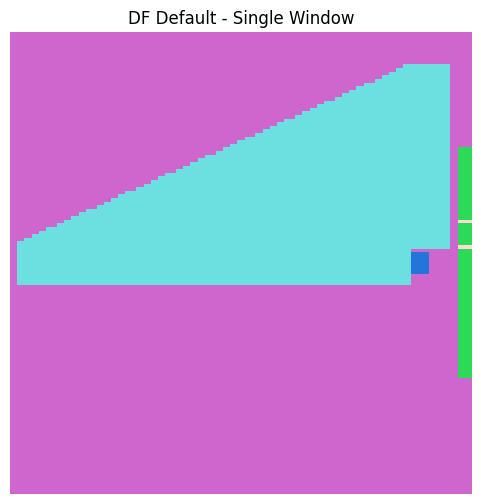

In [28]:
# [[50, 50], [55, 39],[55, 32],[50, 32],[50, 39], [49, 39], [49, 50]],
oa = [0] * 64
oa[20] = 90
oa[27] = 90

obstruction_request = {
            "model_type": "df_default_2.0.1",
            "parameters": {
                "height_roof_over_floor": 10, #
                "floor_height_above_terrain": 1.1, #
                "room_polygon": [[50, 50], [55, 39],[55, 26],[50, 26],[50, 39], [49, 39], [49, 50]],
                "windows": {
                    "test_window": {
                        "x1": 49.8, "y1": 39, "z1": 1.3,
                        "x2": 49.2, "y2": 39.5, "z2": 2.2,
                        "window_frame_ratio": 0.6, #
                        # "direction_angle": 1.5708,
                        "obstruction_angle_horizon": oa,
                        "obstruction_angle_zenith": oa
                    }
                }
            },
            # "mesh": r["mesh"][:18]
        }

response = requests.post(f"{SERVER_URL}/encode", json=obstruction_request)

if response.status_code == 200:
    Path("encoded_df_default.png").write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    img_array = np.array(img)
    print("img_array.shape =", img_array.shape, "dtype =", img_array.dtype)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

## 👉 Multiwindow

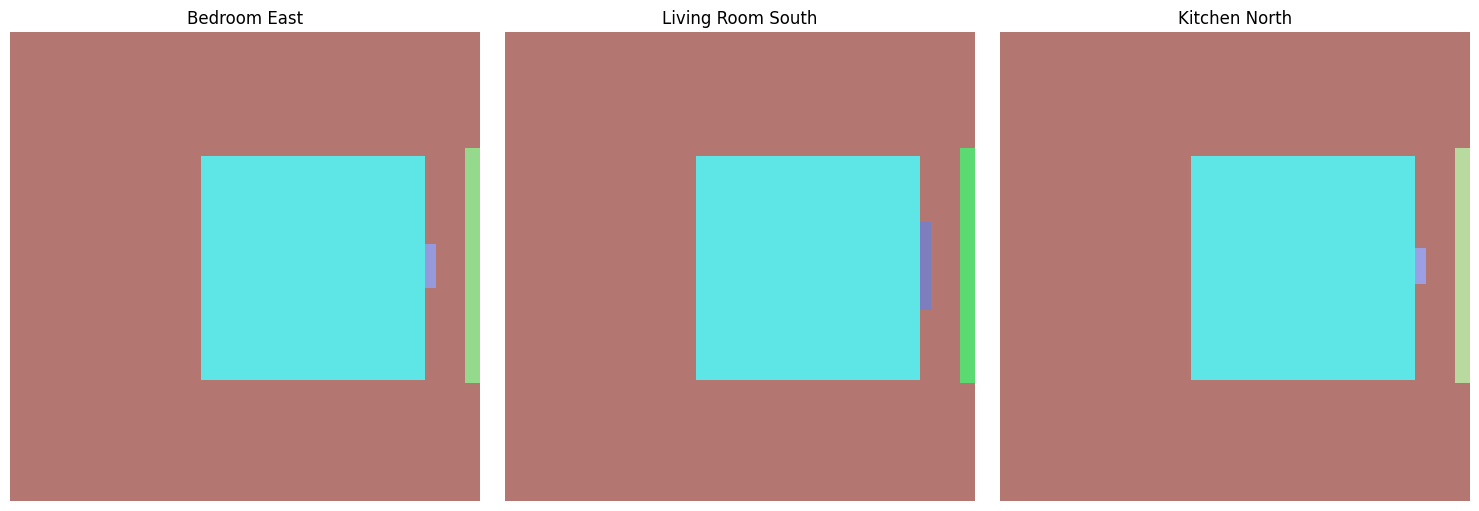

In [29]:
import zipfile
# Load multi-window payload from JSON file
with open("../assets/df_custom_multi_window.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_multi_window.zip").write_bytes(response.content)
    
    images = {}
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        for name in z.namelist():
            images[name.replace('.png', '')] = Image.open(io.BytesIO(z.read(name)))
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for idx, (window_id, img) in enumerate(images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(window_id.replace("_", " ").title())
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

## 👉 DA single window

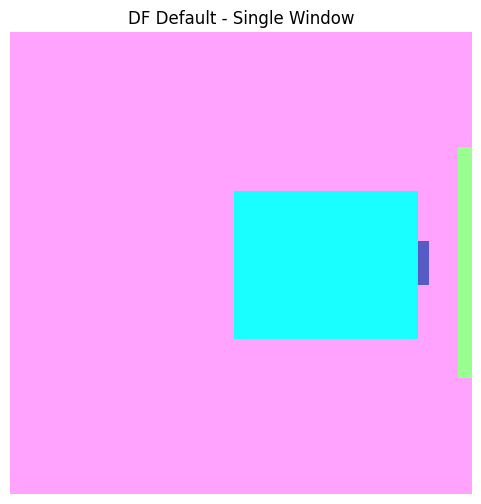

In [162]:
# Load payload from JSON file
inp_file = "da_default_single"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

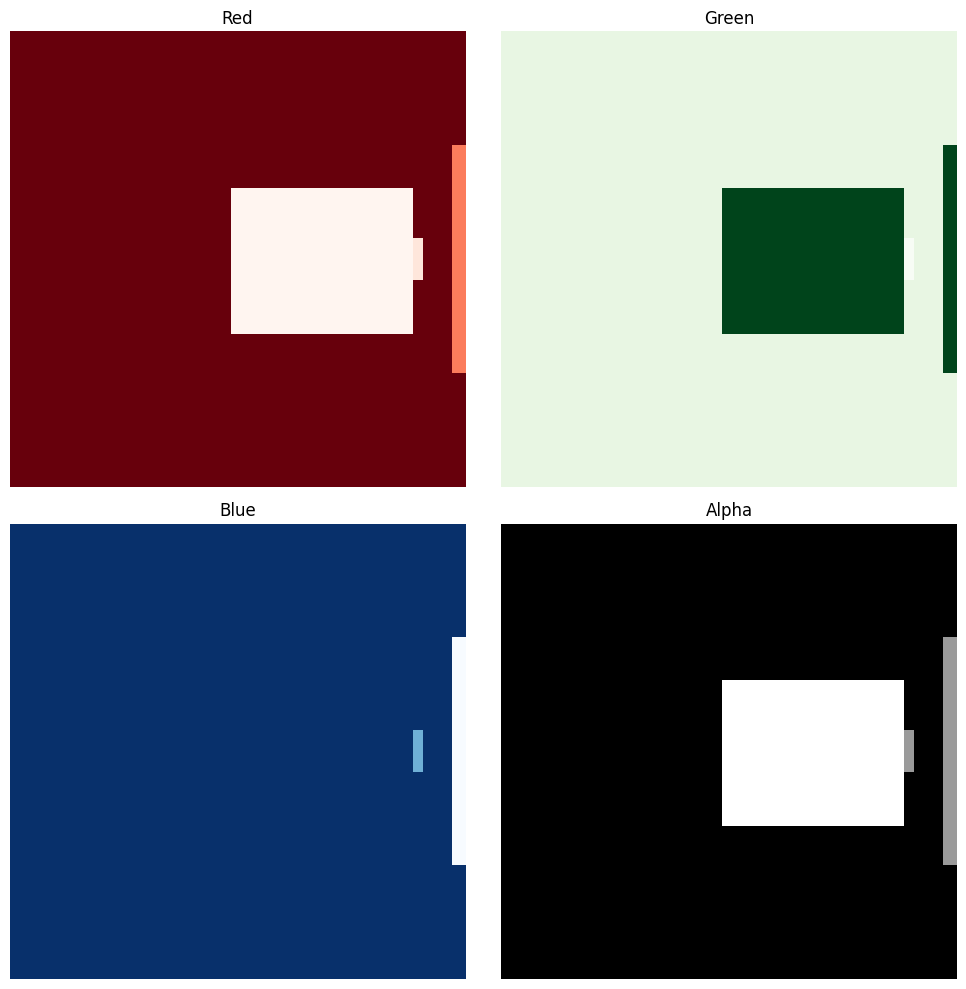

In [163]:
utils.show_individual_channels(inp_file)

### L-shaped multiwindow

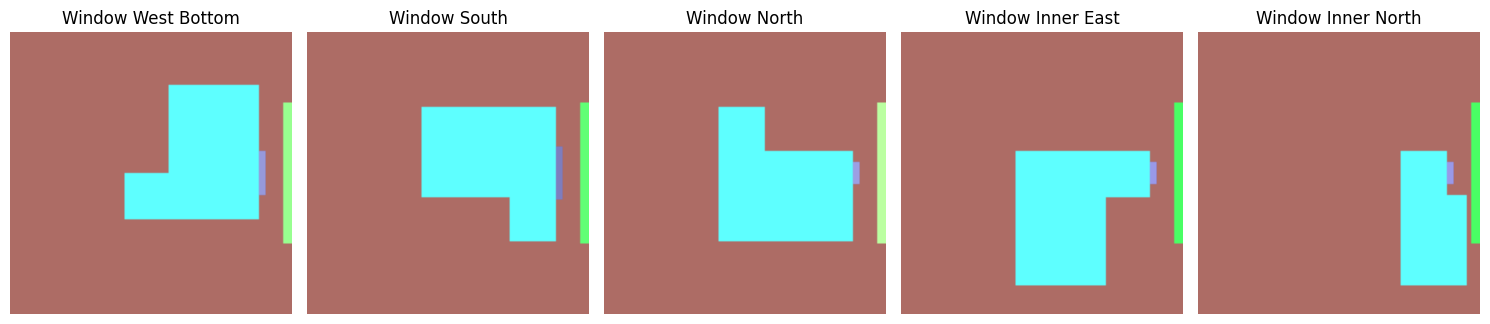

In [164]:
# Load multi-window payload from JSON file
with open("../assets/l_shaped_multi.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_multi_window.zip").write_bytes(response.content)
    
    images = {}
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        for name in z.namelist():
            images[name.replace('.png', '')] = Image.open(io.BytesIO(z.read(name)))
    
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, (window_id, img) in enumerate(images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(window_id.replace("_", " ").title())
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

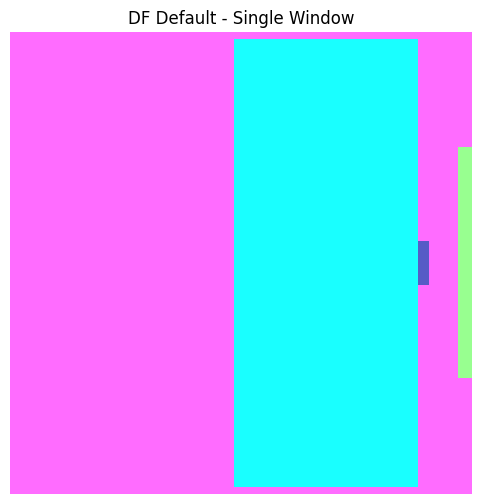

In [166]:
# Load multi-window payload from JSON file
inp_file = "long_room"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

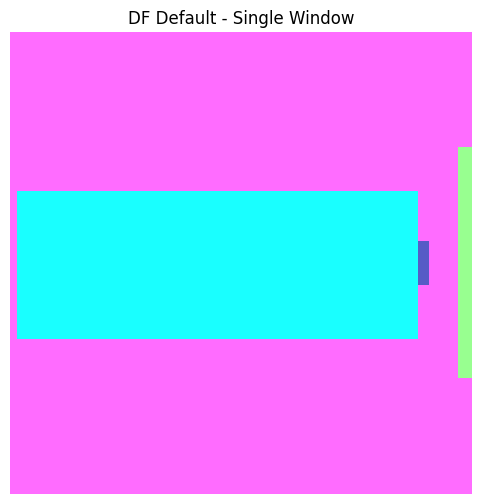

In [168]:
inp_file = "wide_room"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")